# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [40]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

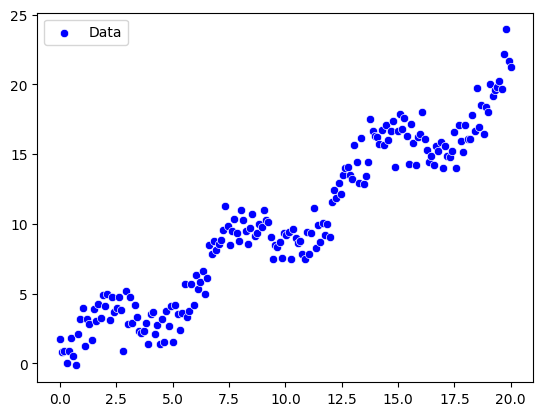

In [41]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [42]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [43]:
df = Simple1DRegressionDataset(X,y)


In [44]:
df[0]


(tensor([0.]), tensor([1.7749]))

In [45]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [46]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.9935]])]

In [47]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)


In [48]:
loss_fn = nn.MSELoss()

In [49]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [50]:
class ComplexRegressor(nn.Module):
    def __init__(self):
        super(ComplexRegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)
    
model = ComplexRegressor()


In [51]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [52]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [53]:
model = ComplexRegressor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [54]:
#model_2 = nn.Linear(in_features=1, out_features=1)

In [55]:
train_simple_network(model,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

258.51629638671875
308.31372451782227
418.658992767334
647.9788780212402
752.4052391052246
752.4516686163843
774.5077141486108
1200.150841590017
1278.771645423025
1372.0106438361108
1475.2029503546655
1636.8684624396265
1657.2889927588403
1679.6243008337915
1902.6566036902368
2184.576098319143
2197.6171416006982
2197.8945758603513
2208.2113082669675
2270.442932870239
2455.2599647305906
2459.2442841790617
2460.756481077522
2529.9570731185377
2541.057181265205
2554.484041120857
2561.881800558418
2616.3011693023145
2630.451621916145
2978.8850630782545
3042.5136107467115
3137.250350859016
3277.265930082649
3307.4060019515455
3308.1579861305654
3538.709896530956
3808.059963669628
3882.193912949413
3898.2247509621084
4121.506336655468
4195.94143339619
4275.319286789745
4346.093334641308
4721.866100754589
4959.50507780537
4960.931604947895
5190.362818326801
5232.739729490131
5326.521010007709
5480.504347410053
5496.001420583576
5643.9524703882635
5874.205628957599
5876.515284147114
6116.30188

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06805513799190521
61.815945610404015
98.55063723027706
100.59646962583065
107.65041373670101
118.38145564496517
154.09562419354916
157.8169610351324
163.2345831245184
165.5647628158331
241.8272139877081
279.4307410567999
293.97185204923153
294.2992281168699
361.1253465861082
367.11286871135235
420.50673620402813
558.7083963602781
622.2154077738523
639.0902818888426
657.4337419718504
691.6161340922117
692.9968671053648
722.5603074282408
771.7367600649595
861.9315232485533
895.1617669314146
918.2983807772398
943.3556145876646
954.9572390764952
987.07182495296
987.8711122125387
987.9472324326634
1021.6314670518041
1046.2535907700658
1062.1369964554906
1070.6694299653172
1140.9864694550633
1176.4960214570165
1192.7247850373387
1250.9418832734227
1253.328946776688
1268.9204775765538
1272.0330616906285
1296.711843200028
1346.9678017571568
1351.4905631020665
1360.3237359002233
1367.8108584359288
1386.2004363015294
1406.1830222085118
1416.3813578560948
1520.5367533639073
1527.2954956963658
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.102895736694336
50.087656021118164
76.88657188415527
112.11380195617676
162.1496295928955
173.79029083251953
243.17540740966797
243.7929699420929
281.6636555194855
294.6307861804962
307.82290291786194
438.0948145389557
521.0577356815338
538.0013830661774
582.388082742691
602.6321699619293
668.5943434238434
668.9866152405739
669.2392638921738
670.6488087177277
710.136750459671
710.192291751504
711.611854210496
779.3812786489725
780.2910498529673
796.2366837412119
797.1639063507318
841.8621027618647
888.8489039093256
906.2717592865229
960.506523385644
970.9797136932611
999.5425837188959
1003.8879239708185
1042.6717450767756
1100.5943067222834
1139.7533300071955
1155.0687663704157
1221.3826167732477
1221.66883854568
1431.0581360310316
1466.1440239399672
1489.1789169758558
1494.9981227368116
1502.7828984707594
1521.0492673367262
1533.6358752697706
1544.7129006832838
1552.2319698780775
1576.413452193141
1641.647972151637
1694.9321670979261
1775.09665684402
1839.405639693141
1843.722929522

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4162396788597107
17.164410531520844
21.882221162319183
34.55864900350571
44.114908158779144
114.02049440145493
146.1193751692772
148.2663328051567
148.95032906532288
224.2422297000885
281.22605538368225
297.42331528663635
321.08242630958557
321.36898797750473
326.32686990499496
326.63428261876106
327.3210501372814
329.1582086980343
329.1657524779439
332.4635010436177
334.24325961619616
357.60733623057604
366.2862026169896
367.565134473145
375.1297587826848
375.3885697796941
377.6559962704778
378.69583017379045
389.22921831160784
398.2360284999013
401.0576925948262
412.4366913512349
440.0202446654439
451.592372007668
498.2503119185567
509.0647001937032
509.06663096509874
509.42860937677324
510.28721988759935
571.4540098961443
591.0506724175066
591.3327743466944
598.2245509084314
639.5606867726892
687.8694941457361
914.2389399465173
920.138672536239
930.9431807454675
989.6600005086511
1177.6292540486902
1182.7179619725794
1206.4184414800256
1226.7685143407434
1227.7498350199312
1228.58

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5253608226776123
93.89068675041199
99.01278614997864
99.89095586538315
123.29332631826401
126.4382089972496
127.63212937116623
130.53270572423935
132.43017596006393
132.66219402849674
132.93112860620022
133.08375822007656
177.95903669297695
207.8177059739828
212.46733985841274
212.51932414993644
216.56671842560172
238.31618627533317
240.95175847038627
282.57594975456595
282.9939004443586
284.27122428640723
313.83493354544044
357.1631043218076
358.812623526901
360.37018981203437
395.2783319018781
419.21238723024726
425.11772790178657
432.3484493754804
445.0102135203779
454.92663350328803
521.7456108592451
568.5269218944013
568.9368150494993
603.5104577802122
613.4677131436765
677.9663322232664
742.5373313687742
755.2938058637083
758.9769695065916
763.4851439259946
802.3760931752622
802.5184382312
907.5696543566883
916.6812142245471
922.8362840525806
937.9162868373096
976.7142223231494
1028.0706485621631
1031.3707052581012
1031.527350526303
1032.3423924855888
1032.547713022679
1061.614

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0007100928924046457
8.534976564755198
8.906178467383143
11.727031939139124
18.152139418234583
21.155410759558436
21.16337574220961
25.85891903139418
26.078321165812667
27.688143200648483
27.76012843794888
28.687753319216426
29.83816397137707
62.11461126751965
200.75984442181652
203.15145122952526
206.73890197224682
206.7433244054555
289.4434968297719
299.4764958684682
300.2631068294286
345.41862822225085
349.31402421643725
461.6184980933904
547.1938078468083
582.5113279884099
652.9426100318669
658.7176053588628
659.4182683890103
659.707818216586
660.476963705325
697.9476134245633
751.7743231718778
751.8301607434987
753.0534095828771
766.1859636371373
767.1949751441716
782.6297743385076
791.0895941322087
809.3388235633611
811.0071083371877
811.9323154752492
813.5689427917241
813.6688319360255
817.3484820043086
825.2722104703425
838.9814752255916
840.2166864787578
858.8137419139384
875.6844923411845
880.9278275882243
880.9561745216488
880.9678195351153
891.1864484184771
891.33311944542

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0746517181396484
20.533559799194336
22.797261953353882
24.385823965072632
25.68480944633484
26.182574182748795
30.27791729569435
30.60676994919777
30.753628209233284
31.38877172768116
31.716857001185417
31.916392862796783
32.03901666402817
35.41449636220932
35.483230009675026
36.096909418702126
37.15690137445927
37.25983899086714
53.850176744163036
82.86056607216597
83.02589350193739
86.14168196171522
90.67995958775282
90.95661153644323
92.08089794963598
92.79909410327673
95.05593433231115
97.55313267558813
98.77710273116827
110.75310542434454
111.02453639358282
113.49105431884527
115.43925764411688
124.07700731605291
124.91174890846014
128.00159003585577
128.6086529120803
157.06277927011251
161.02910574525595
168.2294965609908
180.96827372163534
185.0834585055709
188.33934005349874
191.72151621431112
192.8513569459319
202.94669195264578
206.3806321248412
222.3597113713622
222.51717356592417
225.84741500765085
235.7952471151948
236.94704417139292
236.96039664465934
239.41643988806754

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1453545093536377
2.6556140184402466
2.657410879037343
3.056467254064046
3.202296156785451
3.2053125941893086
3.5194853091379628
3.5253835659241304
5.222507927916013
38.68773696233984
39.061409477493726
39.061666478955885
39.46207590922131
39.82513382061734
53.729373475158354
66.81528141125455
68.53626074417843
79.8920413456799
80.67360665425076
81.32967182024731
81.55279456599965
120.03995429500355
120.86699729188695
130.11037688478245
130.23095761760487
130.67719339355244
130.97753225787892
131.30718853100552
131.37927993162884
138.08240683897748
151.15481551512494
155.48974116667523
156.21863712891354
156.44072813316598
156.6076406739594
161.87349312528386
169.70951597913518
169.7707828223647
183.2839950263442
185.82518326639547
186.90734063982381
188.85230278372183
194.45273756384267
194.4872013159038
198.45945201590075
198.67061184122576
206.27668092920794
231.37964914515032
249.42352579309954
251.1836193628551
253.83986650183215
253.99380948915496
256.3708317555429
257.224537280

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.214846134185791
5.839516997337341
6.339313417673111
6.742169678211212
8.053500950336456
12.680342972278595
13.048298209905624
21.856725066900253
35.139444679021835
47.45447859168053
52.75225147604942
58.037099212408066
84.80326780676842
85.53378817439079
87.90766498446465
87.97023367136717
90.24140333384275
94.18902706354856
97.79485558718443
97.84235357493162
98.01286830753088
128.4305700287223
130.5411666855216
133.91851272433996
134.07058788090944
170.4267928674817
184.7617824152112
190.17490793019533
190.28118166327477
190.42549297213554
195.2322151362896
196.0585358440876
196.05960261356086
196.18330209236592
197.6437833784148
200.67918019276112
201.6590758441016
217.74029456358403
218.12531315069646
225.6112288115546
226.63394271116704
237.03165446501225
239.10452162008733
244.80073391180485
271.6603435156867
272.67911564093083
284.7130330679938
289.23795686941594
291.10808633547276
291.17203467618674
291.48927402030677
303.23273372184485
320.7169542266056
329.80346393119544
33

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.023447036743164
2.1075973585247993
14.70245362073183
17.476222045719624
19.37072790414095
19.976946957409382
24.320573933422565
26.81995213776827
29.418689854443073
38.49146664887667
38.49164699774701
39.75854264956433
40.404382757958956
43.64510970574338
44.065376244601794
44.60364266496617
45.723268471774645
47.77710338693578
53.86526771646459
72.13574501138646
82.77999874216039
82.9971250371309
82.99774863600032
85.68240668653743
86.03401716827648
86.03784634597832
88.72152306564385
105.87711503036553
114.18476464279229
115.61155094631249
124.4619337511831
134.2570015383535
135.1429941249662
136.18976708181435
141.25705309637124
145.28199406393105
145.87979253061349
146.2053100062185
156.96669306285912
156.99637258291477
179.93118131399387
189.479645135405
190.0246635103249
197.92674309253925
197.96833399921888
205.8950803676271
217.22621230274672
224.55112532764906
235.87447051197523
236.26279220968718
243.3618355789804
247.92987261206144
255.28520927816862
256.6626497307443
257.

In [56]:
# lets try our model
model.to('cpu')

model.eval()

with torch.inference_mode():
    y_pred_m2 = model(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

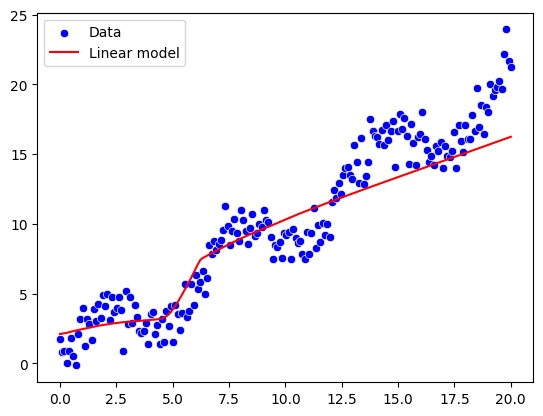

In [57]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
